<a href="https://colab.research.google.com/github/lmoghimi/personal-processing/blob/main/xrd_analysis_Lauren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# timestamps = ['primary-1', ]
shift = True            #
get_timestamps = True
ntimestamps = 5
userdir = "/content/drive/Shareddrives/leoradm_group/NSLS-II_202403"
scriptdir = os.path.join(userdir, 'userScripts')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51_hematite_pellet_H2_blue_take3/integration/run51_hematite_pellet_H2_blue_take3_20240328-161448_1894cd_primary-1_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51_hematite_pellet_H2_blue_take3/integration/run51_hematite_pellet_H2_blue_take3_20240328-161448_1894cd_primary-31_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51_hematite_pellet_H2_blue_take3/integration/run51_hematite_pellet_H2_blue_take3_20240328-161448_1894cd_primary-62_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51_hematite_pellet_H2_blue_take3/integration/run51_hematite_pellet_H2_blue_take3_20240328-161448_1894cd_primary-93_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51_hematite_pellet_H2_blue_take3/integration/run51_hematite_pellet_H2_blue

<ipython-input-14-a35fd79959d8>:67: RuntimeWarning: divide by zero encountered in divide
  d_ref = 0.5*0.1824/np.sin(np.radians(tth_ref/2)) #convert to d-spacing


YES! Save file please!
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run52_limelight_pellet_H2_blue/integration/run52_limelight_pellet_H2_blue_20240328-164902_ec7cd7_primary-1_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run52_limelight_pellet_H2_blue/integration/run52_limelight_pellet_H2_blue_20240328-164902_ec7cd7_primary-31_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run52_limelight_pellet_H2_blue/integration/run52_limelight_pellet_H2_blue_20240328-164902_ec7cd7_primary-62_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run52_limelight_pellet_H2_blue/integration/run52_limelight_pellet_H2_blue_20240328-164902_ec7cd7_primary-93_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run52_limelight_pellet_H2_blue/integration/run52_limelight_pellet_H2_blue_20240328-164902_ec7c

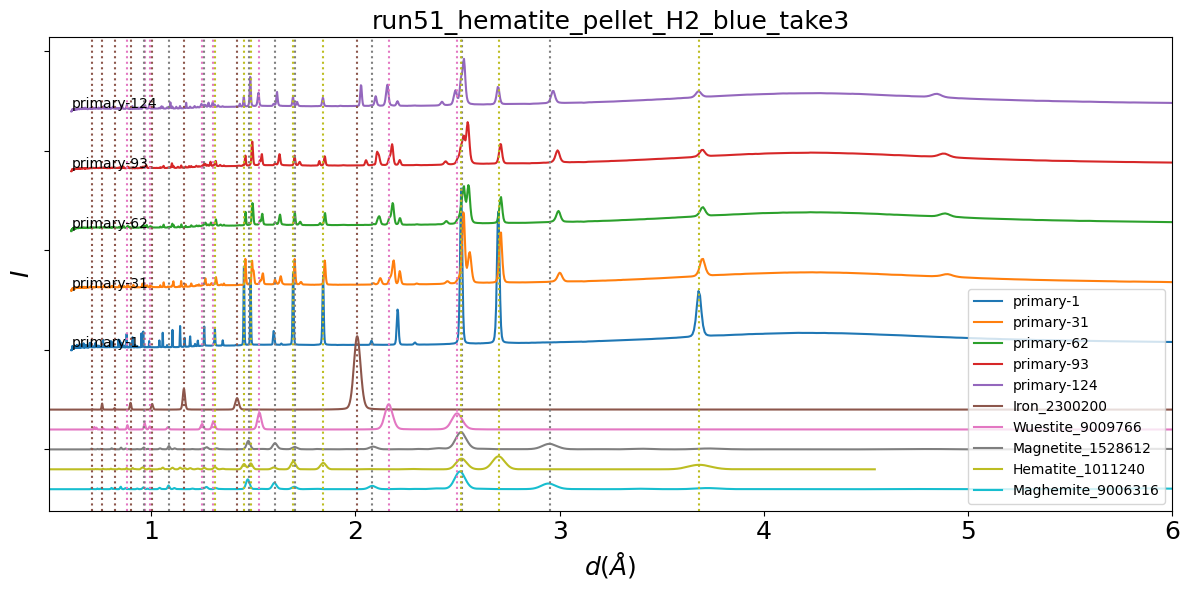

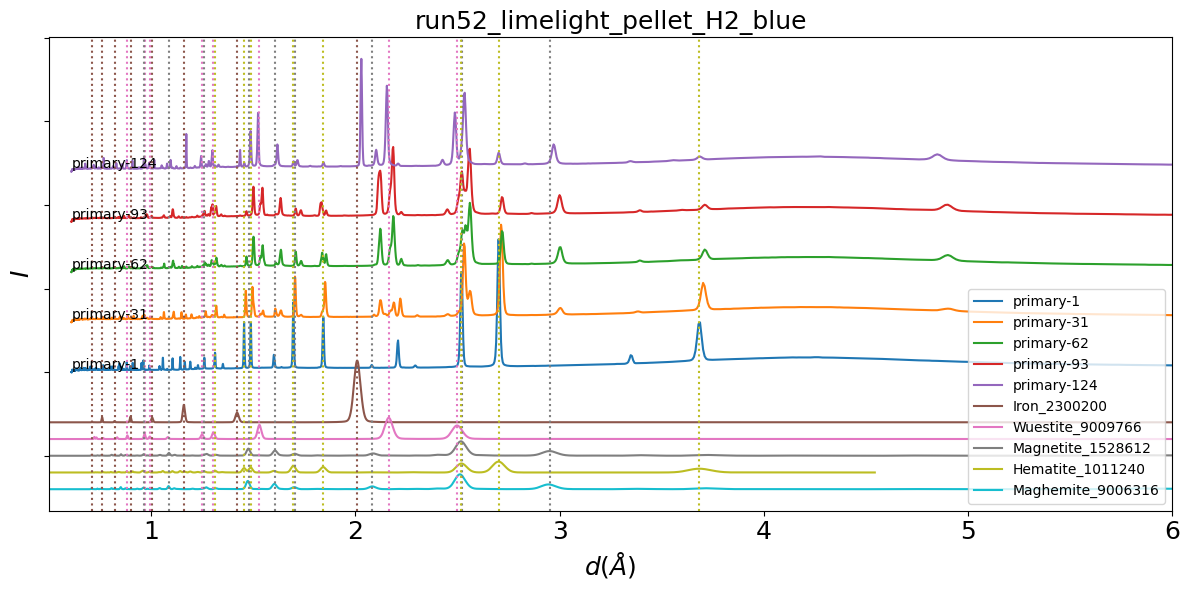

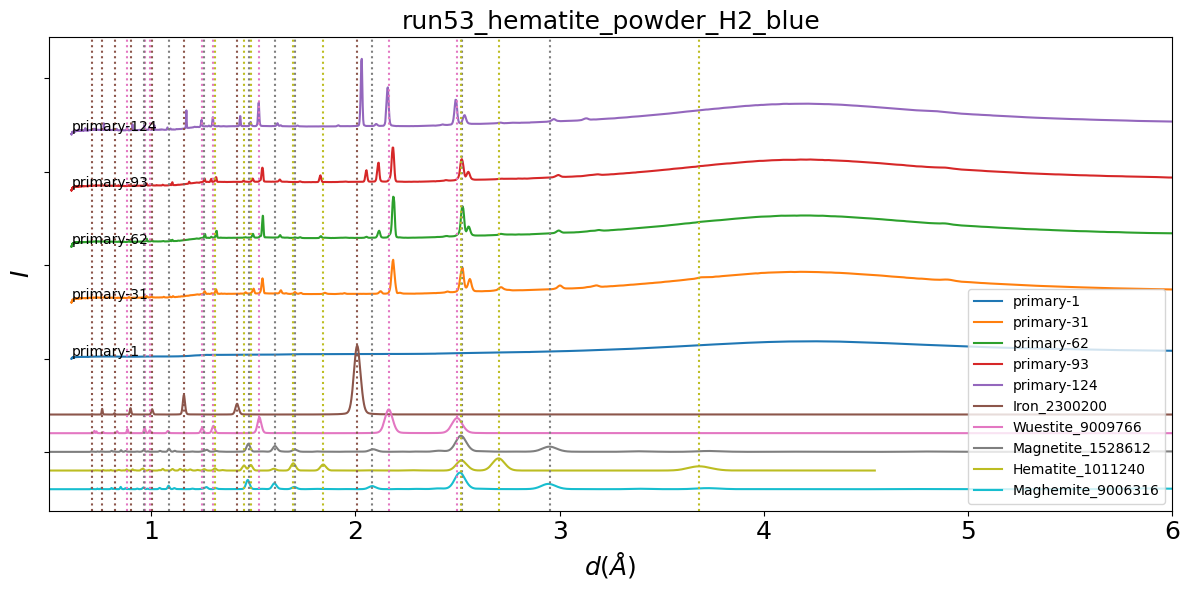

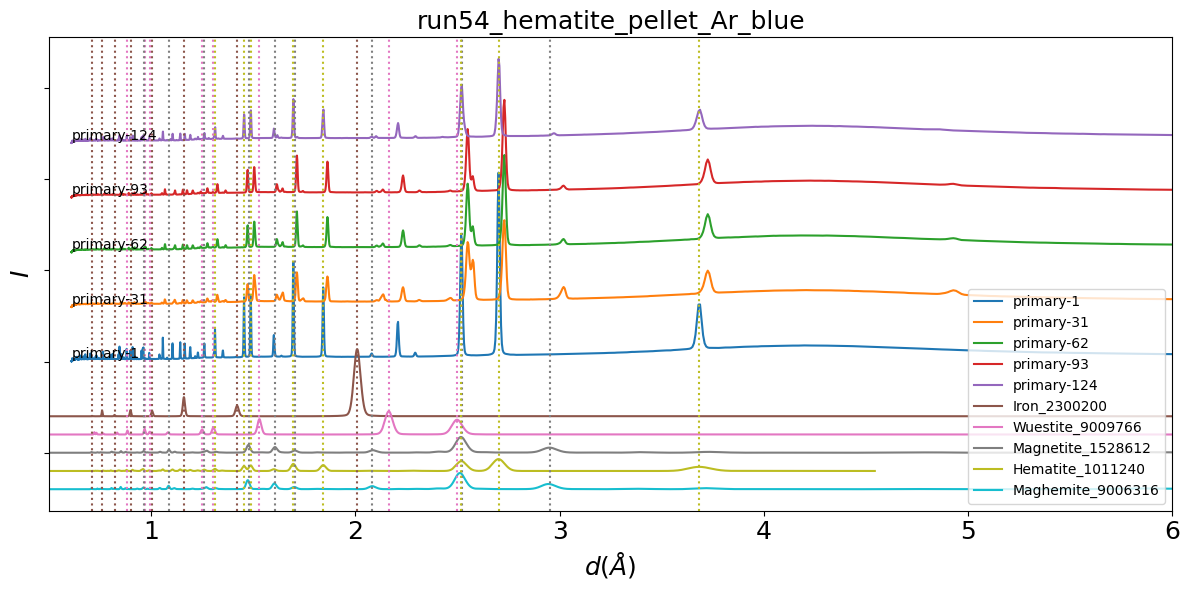

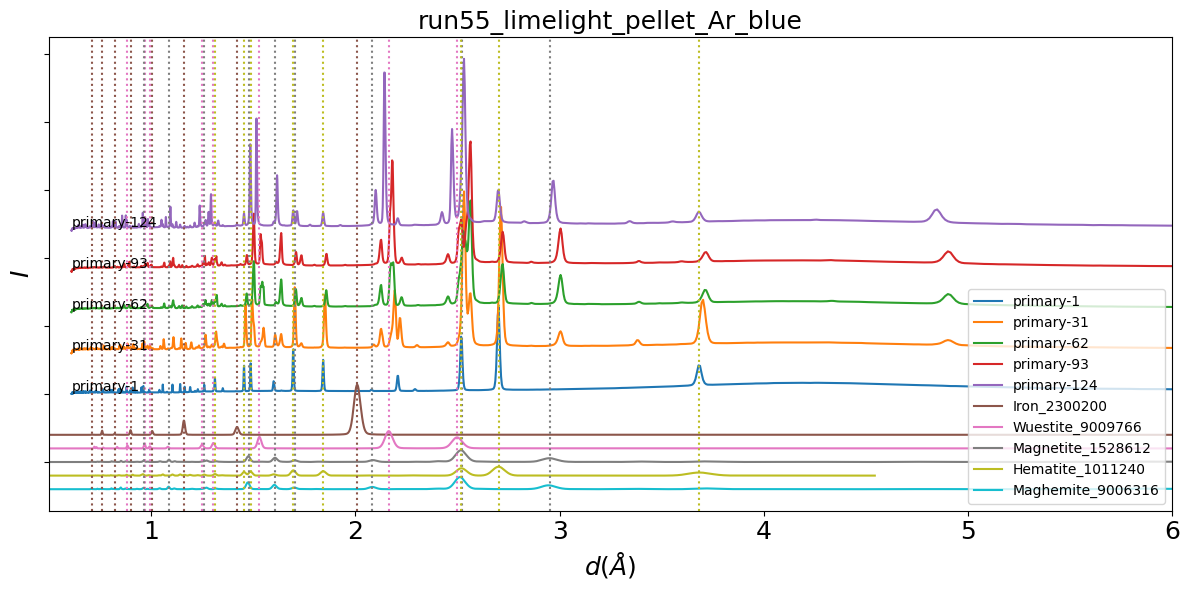

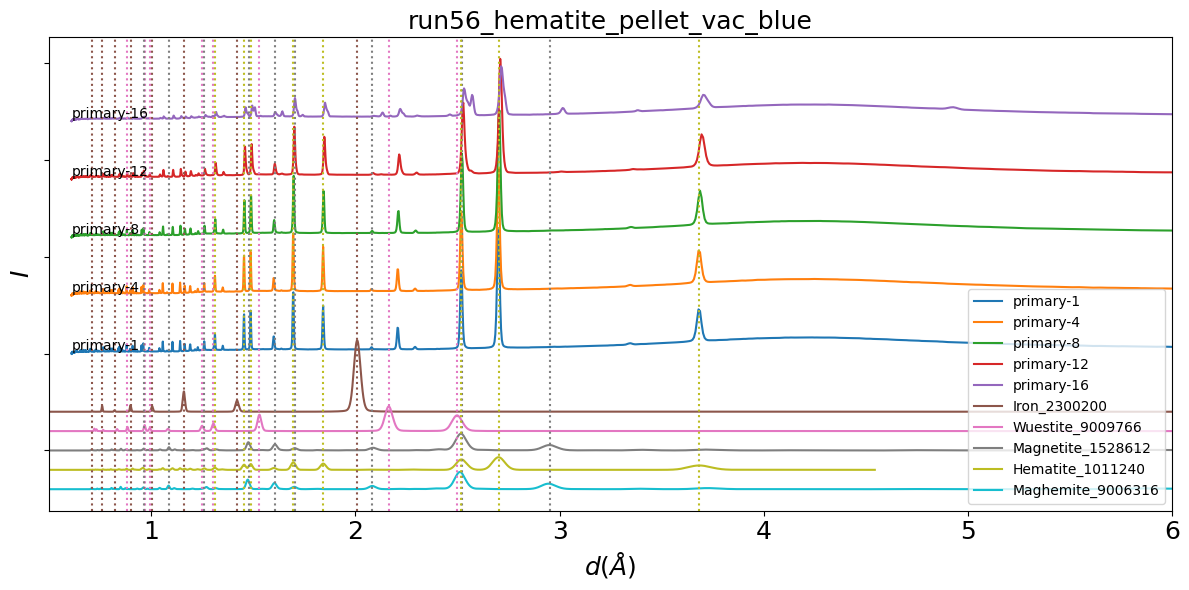

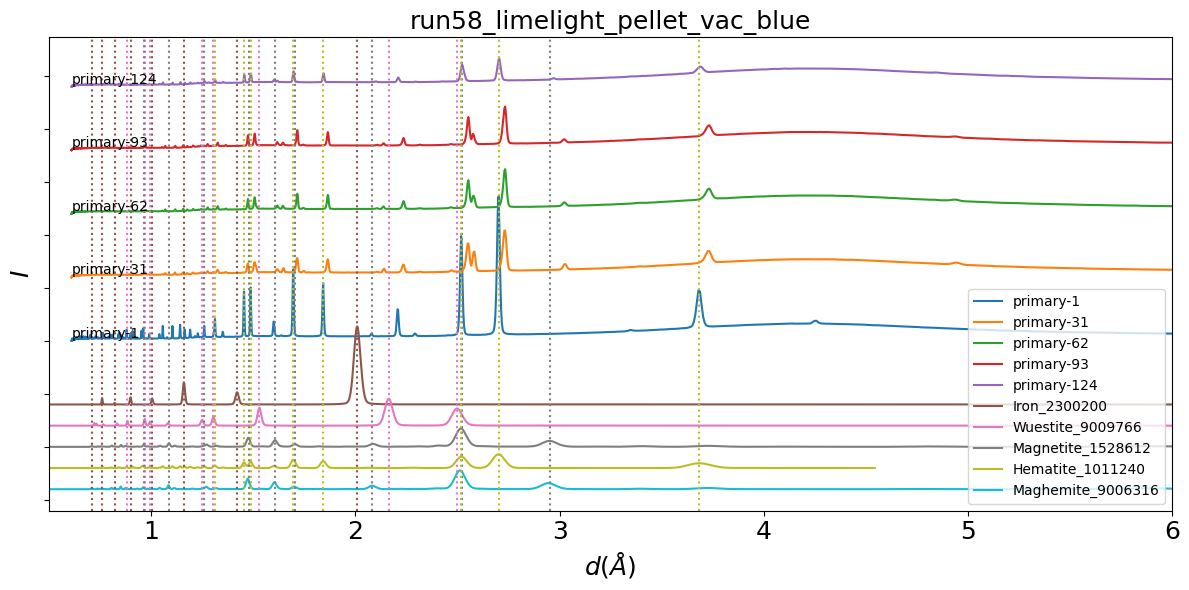

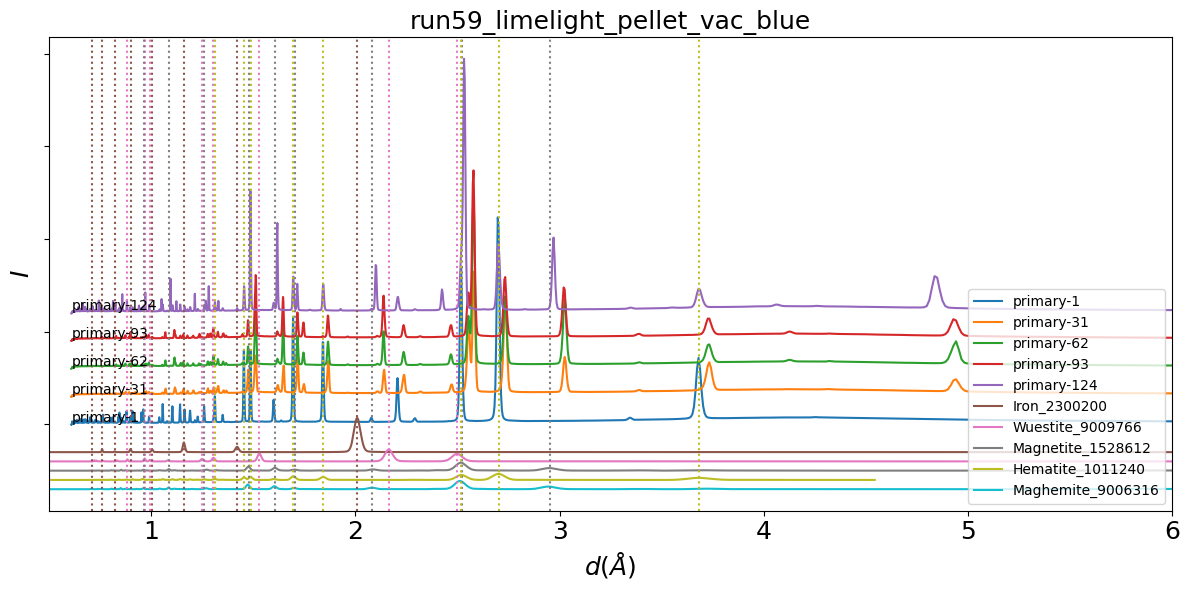

In [14]:
# for run in ['run20', 'run21', 'run22', 'run23', 'run24', 'run25', 'run26', 'run27']:
for run in ['run51', 'run52', 'run53', 'run54', 'run55', 'run56', 'run58', 'run59']:

    ###################### parsing the filename
    tiffdir = os.path.join(userdir, 'tiff_base')
    # print(userdir, tiffdir)
    runslist = glob.glob(tiffdir + '/*')
    # print(runslist)
    runsdict = {}
    for run_item in runslist:
        run_number = os.path.basename(run_item).split('_')[0]
        runsdict[run_number] = run_item
    # print(runsdict)

    file_pattern = os.path.join(runsdict[run], 'integration', '*_mean_tth.chi')
    expname = os.path.basename(runsdict[run])
    # print(file_pattern)
    filelist = glob.glob(file_pattern)
    # print(filelist)
    filedict = {}
    for filename in filelist:
        file_parse = os.path.basename(filename).split('_')
        if not ('ss' in file_parse or 'stg2' in file_parse):
            file_number = file_parse[-3] # this takes the primary number
            filedict[file_number] = filename
            # ntimestamps = 13
        # else:
        #     file_number = file_parse[-3]
        #     filedict[file_number] = filename
        # print(file_number, filename)

    ################# grab ntimestamps curves (equally spacing in time)
    if get_timestamps:
        timestamps = ['primary-%d'%k for k in np.linspace(1, len(filedict)-1, ntimestamps).astype(int)]

    ################# plotting setting
    figsize = (12, 6)
    fs = 18
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)

    ################ plotting selected timestamps
    for iv, timestamp in enumerate(timestamps):
        filename = filedict[timestamp]
        print('Loading file', filename)
        rawdata = np.loadtxt(filename)
        tth = rawdata[:, 0]
        d = 0.5*0.1824/np.sin(np.radians(tth/2)) #Bragg's law in angrstrom
        I = rawdata[:, 1]
        I = I + iv * 300
        #I = I + iv * 100 #iv is basically the index number for the scan. this makes a waterfall plot
        # I = I/I.max() + 0.25 * iv
        ax.plot(d, I, label=timestamp)
        #ax.plot(tth, I, label=timestamp) #####
        ax.text(d[-1], I[-1], timestamp, ha='left', va='bottom')
        #ax.text(tth[-1], I[-1], timestamp, ha='left', va='bottom') #####

    ############### loading references from iron_oxides.txt

    ######### Changed to load multiple reference files, Yifan, 2024/4/12
    ref_phases = ['Iron_2300200', 'Wuestite_9009766','Magnetite_1528612','Hematite_1011240','Maghemite_9006316']
    #ref_phases = ['Maghemite_9006316', 'Hematite_1011240', 'Magnetite_1528612', 'Wuestite_9009766','Iron_2300200']
    ref_shift_y = -100
    for i_phase, ref_phase in enumerate(ref_phases):
        reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt')
        refdata = np.loadtxt(reffile)
        tth_ref = refdata[:, 0]
        d_ref = 0.5*0.1824/np.sin(np.radians(tth_ref/2)) #convert to d-spacing
        I_ref = refdata[:, 1] - refdata[0, 1] + ref_shift_y*(i_phase + 1) -200
        # I_ref = I_ref/I_ref.max() - 1
        ax.plot(d_ref, I_ref, label= ref_phase)
        #ax.plot(tth_ref, I_ref, label= ref_phase) #####
        #ax.plot(tth_ref, I_ref, label='Ref_' + ref_phase)
        #ax.text(tth_ref[-1], I_ref[-1], ref_phase, ha='left', va='bottom')

    xlim_left, xlim_right = 0.5, 6 #for d
    #xlim_left, xlim_right = -0.25, 20 #for tth #####
    ax.set_xlim(xlim_left, xlim_right)
    ax.legend(loc='lower right')
    ax.set_xlabel(r'$d  ({\AA})$', fontsize=fs)
    #ax.set_xlabel(r'$2\theta (\degree)$', fontsize=fs) #####
    ax.set_ylabel(r'$I$', fontsize=fs)
    ax.set_title(expname, fontsize=fs)
    ax.tick_params(labelsize=fs)
    ax.set_yticklabels([]) #turns off tick labels for vertical axis

################# plot vertical lines for the reference phase peaks

    #define the lines you want to plot for each phase

    lincol_fe='tab:brown' #iron
    ref_tth_fe = [5.205, 9.022, 7.364, 10.421, 11.656, 12.772, 13.801, 14.759] #2theta
    ref_d_fe = 0.5*0.1824/np.sin(np.radians(np.divide(ref_tth_fe,2))) #conversion to d
    for i_vert_line in ref_d_fe: #plot the vertical lines
    #for i_vert_line in ref_tth_fe:
        plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_fe)

    lincol_w='tab:pink' #wustite
    ref_tth_w = [4.833, 6.837, 4.185, 8.019, 10.820, 8.376, 11.856, 10.545] #remove 3rd number if plot in tth
    ref_d_w = 0.5*0.1824/np.sin(np.radians(np.divide(ref_tth_w,2)))
    for i_vert_line in ref_d_w:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_w)

    lincol_m='tab:gray' #magnetite
    ref_tth_m = [4.145, 7.083, 6.520, 3.540, 9.639, 5.019, 6.143, 8.324, 10.846] #remove 1st one if plot in tth
    ref_d_m = 0.5*0.1824/np.sin(np.radians(np.divide(ref_tth_m,2)))
    for i_vert_line in ref_d_m:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_m)

    lincol_h='tab:olive' #hematite
    ref_tth_h = [3.870, 4.150, 6.167, 5.675, 7.033, 7.190, 2.837, 7.973] #remove 2nd number if plot in tth
    ref_d_h = 0.5*0.1824/np.sin(np.radians(np.divide(ref_tth_h,2)))
    for i_vert_line in ref_d_h:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_h)

 ##########
    #enter y to save the figure
    response = "y" ##### Would you like to save this plot? Enter y/n
    xrd_type = "d" ##### or tth
    if response == "y":
      print("YES! Save file please!")
      fname_typ = 'wf_'+ xrd_type + '_' + expname + '.png' #wf = waterfall
      save_loc = os.path.join(userdir, 'userAnalysis' + '/' + 'waterfallPlots')
      if not os.path.isdir(save_loc):
          os.makedirs(save_loc)
      plt.savefig(save_loc + fname_typ)

    elif response == "n":
      print("No worries. Have a good day.")
      plt.show()
    else: print("Please enter yes or no.")


    '''
    answer = input("Would you like to save this plot? Enter y/n: ")
    if answer.lower() == "y":
      print("YES! Save file please!")
    elif answer.lower() == "n":
      print("No worries. Have a good day.")
    else: print("Please enter yes or no.")
    '''



In [15]:
import cv2
image_folder = save_loc
video_name = 'test_video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [ ]:
#section to reinsert, if you decide to change the reference file input method
############### loading references from iron_oxides.txt
    '''
    reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', 'iron_oxides.txt') ###############
    with open(reffile, 'r') as f:
          header = f.readline()
    labels = header.split()
    refdata = np.loadtxt(reffile, skiprows=1)
    ncol = refdata.shape[1]
    tth_ref = refdata[:, 0]
    for i in range(1, ncol):
        if labels[i] in ref_phases:
            I_ref = refdata[:, i]
            # if not shift:
            I_ref = I_ref - I_ref[0]
            # I_ref = I_ref/I_ref.max()
            if shift:
                # frac = 1/(len(ref_phases)+1)
                # I_ref = I_ref*frac
                # I_ref = I_ref - 1 + frac*(i-1)
                I_ref = I_ref - 50*(i-1)
            ax.plot(tth_ref, I_ref, label=labels[i])
            ax.text(tth_ref[0], I_ref[0], labels[i], ha='right', va='bottom')
    '''

Start time: 2023-12-14 20:21:54-08:00 delta t: 3

Timestamp from BNL: 2023-12-14 23:43:16.100371-05:00


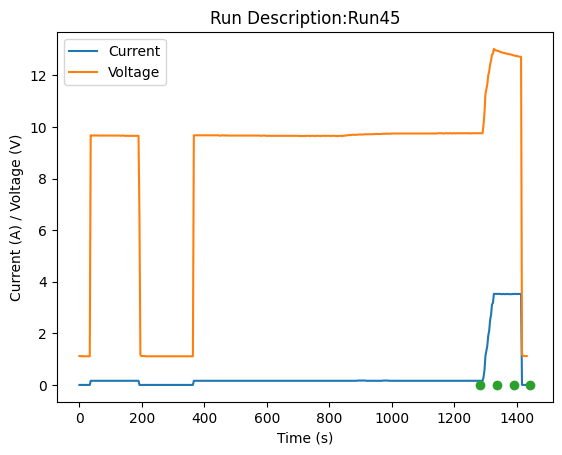

In [ ]:
### generating laser plot figure
import time
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import timedelta, timezone

userdir = "/content/drive/Shareddrives/leoradm_group/NSLS-II_202312"
scriptdir = os.path.join(userdir, 'userScripts')
logfile = os.path.join(scriptdir, 'logfiles/LOG-Dec.14.2023-08.45.38_Run45.csv') ##### Run45 is in PST!
with open(logfile, 'r') as f:
    line = f.readline()
    data = []
    while line != '':
        line_tag = line.split(':')[0]
        if line_tag == 'Description':
            run_number = line.split()[-1]
        elif line_tag == 'StartTime':
            # start_time = parser.parse(':'.join(line.split(':')[1:]) + ' EST', tzinfos={'EST': timezone(-timedelta(hours=5))}) ################## For runs before 45
            start_time = parser.parse(':'.join(line.split(':')[1:]) + ' PST', tzinfos={'PST': timezone(-timedelta(hours=8))})   ################## For run 45 and after
        elif line_tag == 'Sampling':
            delta_t = int(line.split(':')[1][:-2])
        elif line_tag == 'Record':
            head_str = line.split(':')[1].split(',')
        elif line_tag == 'Rec':
            data_str = line.split(':')[1].split(',')
            data_line = [int(k) for k in data_str]
            data.append(data_line)
        line = f.readline()

print('Start time:', start_time, 'delta t:', delta_t)
print('')

log_table = os.path.join(scriptdir, 'table_csv_2024/sample_hematite_blue_vac_run45_ef4fe4_20240105_215121.csv') #####
with open(log_table, 'r') as f:
    line = f.readline()
    header = line.split(',')
    sequence = []
    timetable = []
    line = f.readline()
    while line != '':
        sequence.append(int(line.split(',')[0]))
        time_str = line.split(',')[1]
        time_est = parser.parse(time_str).replace(tzinfo=timezone.utc).astimezone(tz=timezone(-timedelta(hours=5)))
        timetable.append(time_est)
        line = f.readline()
    sequence = np.array(sequence)

print('Timestamp from BNL:', timetable[0])

record_times = [(k - start_time).total_seconds() for k in timetable]
# print(timetable[0] - start_time)
# print(timetable[0], timetable[1], timetable[1] - timetable[0])
# print(np.array(data))
# print(head_str)
rawdata = np.array(data)
t = rawdata[:, 0] * delta_t
V = rawdata[:, 1]/1000
I = rawdata[:, 2]/1000
fig, ax = plt.subplots()
ax.plot(t, I, t, V)
#RT = np.array(record_times)[[0, 121, 242, 364]] ##### these points are for run39
RT = np.array(record_times)[[0, 120, 241, 362]] ##### these points are for run45 !!remember to subtract 1 from the runs for python's indexing
ax.plot(RT, np.zeros(RT.size), 'o')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current (A) / Voltage (V)')
ax.legend(['Current', 'Voltage'])
ax.set_title('Run %s' % run_number)
plt.show()